In [1]:
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

res = []
for file in glob.glob("LiftDistribution_*.csv"):
    df = pd.read_csv(file)
    res.extend(df.to_dict('records'))
df = pd.DataFrame(res)

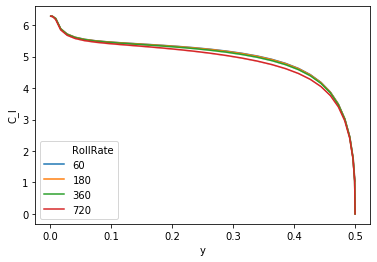

In [2]:
data = df[(df['aoa']==0) & (df['span'] == 100)].copy()
data['RollRate'] = pd.Categorical(data['RollRate'].round(1))
data['C_l'] = np.clip(data['C_l'],0,np.pi*2)
sns.lineplot(data = data, x = 'y',y= 'C_l',hue='RollRate')

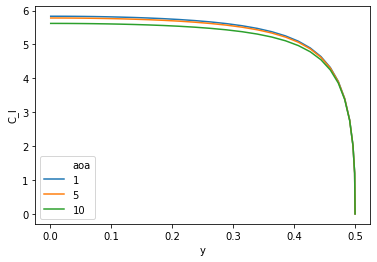

In [3]:
data = df[(df['RollRate']==0) & (df['span'] == 100)].copy()
data['aoa'] = pd.Categorical(data['aoa'].round(1))
data['C_l'] = np.clip(data['C_l'],0,np.pi*2)
sns.lineplot(data = data, x = 'y',y= 'C_l',hue='aoa')

In [4]:
data_aoa_5 = df[(df['RollRate']==0) & (df['span'] == 100) & (df['aoa'] == 5)].copy()
data_rr_180 = df[(df['RollRate']==60) & (df['span'] == 100) & (df['aoa'] == 0)].copy()

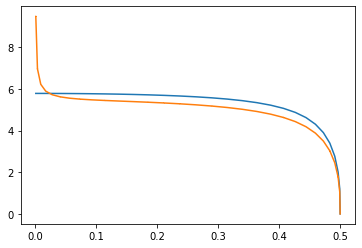

In [5]:
plt.plot(data_aoa_5['y'],data_aoa_5['C_l'])
plt.plot(data_rr_180['y'],data_rr_180['C_l'])
